# Take a look at price data

In [11]:
#TODO see if there is better info with regex

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd

In [14]:
df_d=pd.read_json('bizbuysell.detail.lines.json',lines=True)

In [15]:
df_l=pd.read_json('bizbuysell.list.lines.json',lines=True)

In [16]:
df=pd.concat([df_d[['s_id','s_price', 's_name']],df_l[['s_id','s_price','s_name']]])

In [17]:
df.shape

(302163, 3)

In [18]:
df.columns=['id','price','title']

In [19]:
df.shape

(302163, 3)

In [20]:
df=df.dropna()

In [21]:
df.shape

(302016, 3)

In [22]:
df=df.drop_duplicates('id')

In [23]:
df.shape

(39198, 3)

In [24]:
df.head()

,id,price,title
0,2067319.0,2500000.0,Popular Marina in Central New Jersey in Middle...
1,1990890.0,225000.0,"High Exposure in Mays Landing, New Jersey - Bi..."
2,2050006.0,425000.0,"Rental Units with Real Estate in Randolph, New..."
3,2039720.0,595000.0,"Duplex, Short term or Long term in Pinellas Co..."
4,1576680.0,1050000.0,"Major Price Reduction Rest/Tavern/ 13,000sq. f..."


In [25]:
df['price'].describe()

count    3.919800e+04
mean     1.012346e+06
std      7.354591e+06
min      1.000000e+00
25%      1.500000e+05
50%      3.500000e+05
75%      8.500000e+05
max      1.250000e+09
Name: price, dtype: float64

In [26]:
df['price'].mean(), df['price'].mode()

(1012345.7462115414,
 0    250000.0
 Name: price, dtype: float64)

<Axes: xlabel='id', ylabel='price'>

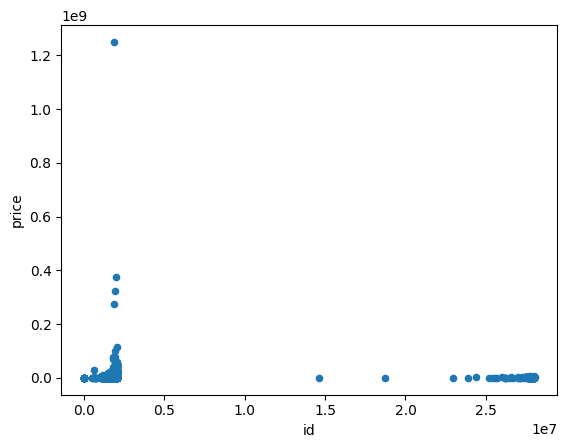

In [27]:
df.plot.scatter('id','price')

In [28]:
list(df[df.price > 0.05e9].title)

['Orange Lake Rv Resort Development Lakefront High-Quality Development in Reddick, Florida - BizBuySell',
 'Janitorial Cleaning Supply Packaging Solutions Provider and Manufactur in Philadelphia County, Pennsylvania - BizBuySell',
 'Well Established Small Engine Repair Business for Sale in Stephenville, Texas - BizBuySell',
 'Crazy Busy! line all day for this Fast Food Franchise #10793 in Mesa, Arizona - BizBuySell',
 '2 Brand New Marriott Brand Hotels, Queens, NY in Flushing, New York - BizBuySell',
 '$25M EBITDA (Annualized) Warehouse Trans. 3PL / Strategic Buyer Only in Pennsylvania - BizBuySell',
 '20-Year Old Leading Manufacturing Business of Aluminum Profile in 34380 - BizBuySell',
 'Disruptive Fintech Fast Growing SaaS Company in Texas - BizBuySell',
 'Bank for Sale in Arizona, United States of America in Phoenix, New York - BizBuySell',
 'Large Multi-Unit Auto Maintenance Franchise with Real Estate in Georgia - BizBuySell',
 'SOCAL RETAIL OPPORTUNITY: 3 OPERATIONAL STOREFRONTS 

In [29]:
list(df[df.price < 1000].title)

['Successful Gym for sale in Sugar Land, Texas - BizBuySell',
 'Retail, Delivery, Manufacturing & Distro (North Hollywood, CA) #835 in North Hollywood, California - BizBuySell',
 'LES Fully Built Restaurant on Busy Block! No Key Money! in New York, New York - BizBuySell',
 'Oil and Gas MWD Sales, Leasing, Rentals and Repair Services in Conroe, Texas - BizBuySell',
 'Established Retail Pharmacy Asking (195k) in Stafford, Texas - BizBuySell',
 'Built Out Restaurant W/ Liquor License in Owings Mills, Maryland - BizBuySell',
 'Two Gas Stations in Northwood, Ohio! in Northwood, Ohio - BizBuySell',
 'BEAUTIFUL Gas Station near Greenville, MS! Asking Zero Goodwill! in Leland, Mississippi - BizBuySell',
 'Fastest growing, established and profitable franchise for sale in Cerritos, California - BizBuySell',
 'Quickly Expanding Mental Health Practice - Two Locations in Denver, Colorado - BizBuySell',
 'Three Shutdown Gas Stations in KS For Lease! Newly Rebranded!! in Seneca, Kansas - BizBuySell',

# IQR

In [30]:
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1

filtered = df.query('(@Q1 - 1.5 * @IQR) <= price <= (@Q3 + 1.5 * @IQR)')

<Axes: xlabel='id', ylabel='price'>

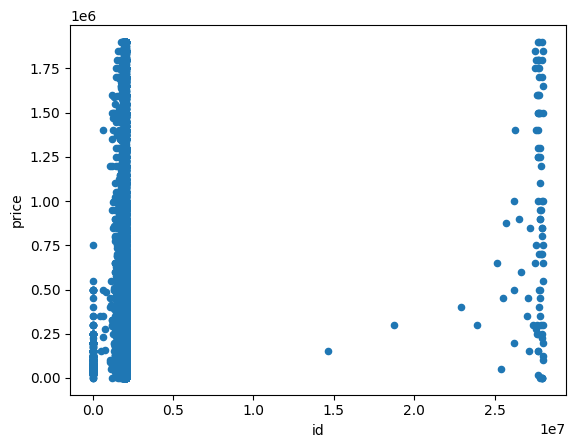

In [31]:
filtered.plot.scatter('id','price')

<Axes: >

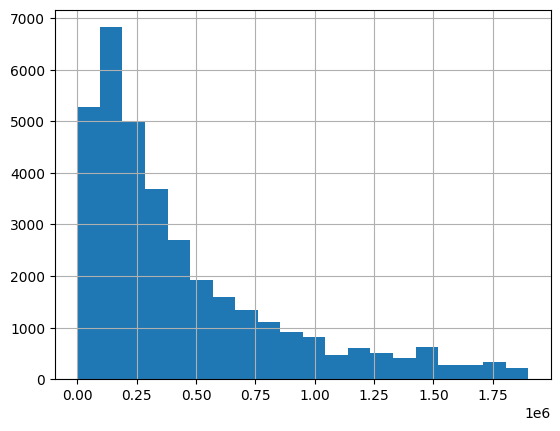

In [32]:
filtered['price'].hist(bins=20)

In [42]:
def get_price_chunks(t):
    t=str(t)
    l=len(t)
    idx=[]
    r=t.find('$')
    while r != -1:
        idx.append(r+1)
        r=t.find('$',idx[-1])
    chunks=[]
    for i in idx:
        s=i-20
        if s<0:
            s=0
        e=i+20
        if e<1:
            e=l
        chunks.append(t[s:e])
    if len(chunks):
        return chunks
    return pd.NA

In [43]:
df_d.loc[0]

s_breadcrumbs                [Real Estate For Sale, New Jersey, Marinas and...
s_b_desc                     It is fully owned by a man and his wife since ...
s_b_name                     Popular Marina in Central New Jersey in Middle...
s_b_url                      https://www.bizbuysell.com/Business-Real-Estat...
s_b_image                    /shared/listings/defaultphotos/standard/sharin...
s_b_local                                                            Middlesex
s_b_region                                                          New Jersey
s_category                                                 Marinas and Fishing
s_desc                       It is fully owned by a man and his wife since ...
s_similar                                          [1864705, 2071534, 2057087]
s_name                       Popular Marina in Central New Jersey in Middle...
s_id                                                                 2067319.0
s_url                        https://www.bizbuysell.

In [44]:
df_p=df_d[['s_id','s_name']]

In [45]:
df_p['pc']=df_p['s_name'].apply(get_price_chunks)

In [54]:
df_p=df_p.dropna()
df_p=df_p.explode('pc')

In [55]:
df_p

,s_id,s_name,pc
42,1970388.0,"13,500 SF Banquet Hall, Lodge, Other for sale ...",", Other for sale - $495K in Middletown,"
47,2062254.0,"$109,900-Former Childcare Facility/Community C...","$109,900-Former Child"
48,1998399.0,High-Volume Family Restaurant w/Gaming (Proper...,ty Included)-Sales $2.3M in North Rivers
64,2052558.0,"Japanese Restaurant for Sale! | $429,000 in Fr...","aurant for Sale! | $429,000 in Fremont,"
156,2058389.0,2021 Sale $1.66 Mil / 2022 Sales $1.7 Mil / Se...,2021 Sale $1.66 Mil / 2022 Sale
...,...,...,...
38546,2074229.0,National Gym Franchise Territory - $10K discou...,nchise Territory - $10K discount! - BizB
38550,2081026.0,Express Employment Professionals Wadsworth Ohi...,"als Wadsworth Ohio $85,000 - BizBuySell"
38551,2080519.0,"$300,000 CLIA Certified Lab For Sale (Novitas ...","$300,000 CLIA Certifi"
38560,1964807.0,Fence Installation. Semi-absentee owner. $2.8M...,mi-absentee owner. $2.8MM Average Gross


In [56]:
#df_p.to_csv('test.csv')

In [62]:
def proc_text_lines(t):
    t=str(t)
    ts=t.split('\n')
    tsl=[]
    for t in ts:
        t=t.lower().strip()
        if len(t):
            tsl.append(t)
    if len(tsl):
        return tsl
    return pd.NA

In [63]:
df_p=df_d[['s_id','p_financials_text','p_details_text']]

In [64]:
df_p['f']=df_p['p_financials_text'].apply(proc_text_lines)

In [65]:
df_p['d']=df_p['p_details_text'].apply(proc_text_lines)

In [66]:
df_pf=df_p.dropna(subset=['s_id', 'f'])

In [69]:
df_pf.loc[0].f

['asking price:',
 '$2,500,000',
 'gross revenue:',
 '$100,299',
 'price/sq. ft.:',
 'n/a',
 'noi:',
 'n/a',
 'building sf:',
 'n/a',
 'ff&e:',
 'n/a',
 'year built:',
 '1965']

In [70]:
df_pd=df_p.dropna(subset=['s_id', 'd'])

In [71]:
df_pf.loc[0].d

['location:',
 'middlesex county, nj',
 'type:',
 'other business real estate',
 'building status:',
 'established',
 'facilities:',
 'inventory included: $420,000']